In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# Load the dataset
df = pd.read_csv('ML Project/cleaned_Algerian_forest_fire.csv')

In [35]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [36]:
df.drop(['day', 'month', 'year'], axis=1, inplace=True)

In [37]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [38]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),1, 0)

In [39]:
df['Classes'].value_counts()

Classes
0    137
1    106
Name: count, dtype: int64

In [40]:
X = df.drop('FWI', axis=1)
y = df['FWI']

In [41]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,1,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,1,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,1,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,1,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,0,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,1,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,1,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,1,1


In [42]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [44]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((182, 11), (61, 11), (182,), (61,))

Text(0.5, 1.0, 'Correlation Matrix')

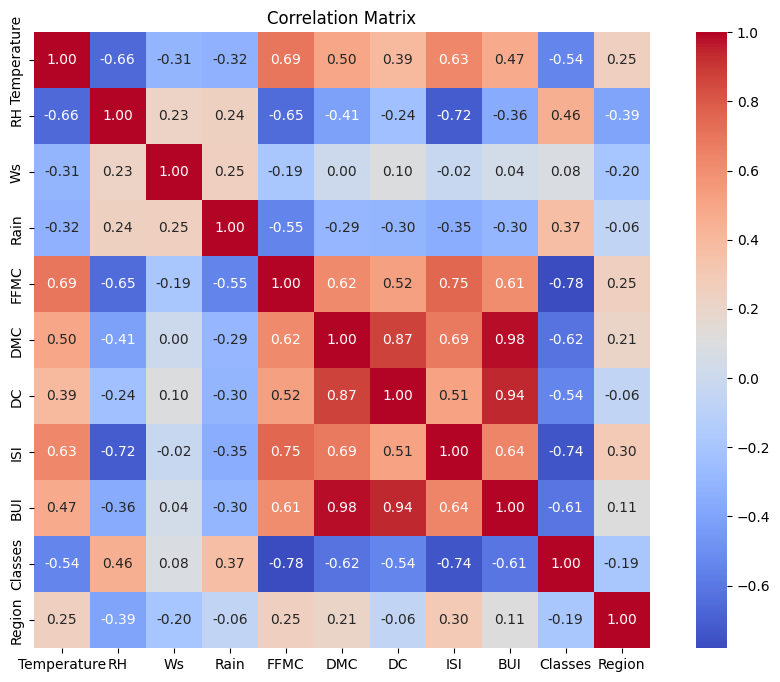

In [45]:
# Check for multicollinearity
plt.figure(figsize=(12, 8))
corr = X_train.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')

In [46]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  # we are interested in absolute correlation
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [47]:
corr_features = correlation(X_train, 0.85) 

In [48]:
# Drop highly correlated features
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)
X_train.shape, X_test.shape

((182, 9), (61, 9))

In [49]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape, X_test.shape


((182, 9), (61, 9))

In [50]:
X_train

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
         1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
         1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
        -0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
         1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
        -0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
         1.10431526, -0.98907071]], shape=(182, 9))

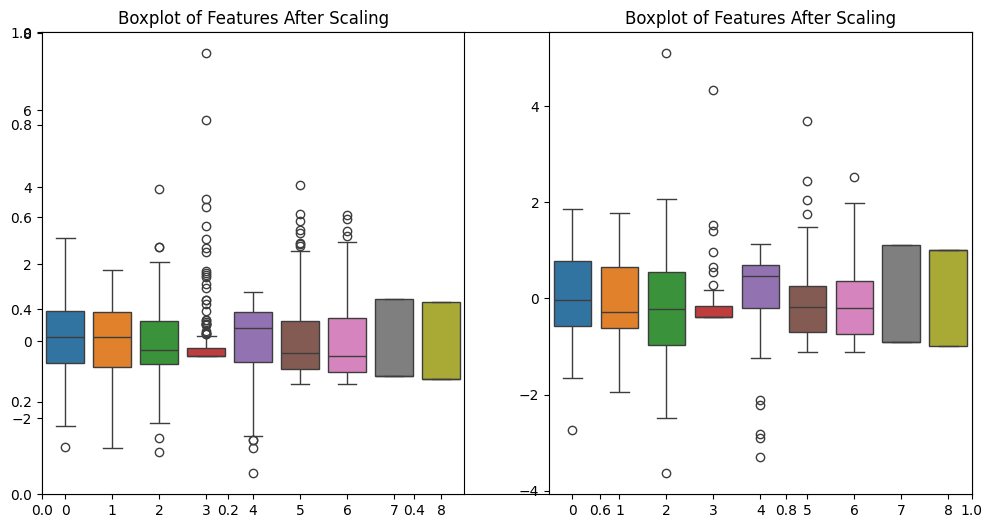

In [51]:
# Boxplot to understand Effect of Scaling
plt.subplots(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('Boxplot of Features After Scaling')
# Check for outliers after scaling
plt.subplot(1, 2, 2)
sns.boxplot(data=X_test)
plt.title('Boxplot of Features After Scaling')
plt.show()

## Linear Regression Model

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [53]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
# Evaluate the model
print("Coefficients:", lin_reg.coef_)
print("Intercept:", lin_reg.intercept_)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
print(f'Mean Absolute Error: {mae}')

Coefficients: [-0.03634495 -0.17441065  0.00703214 -0.04108155 -0.82319823  3.6982583
  4.84057298 -0.40422124 -0.39259928]
Intercept: 7.156043956043957
Mean Squared Error: 0.6742766873791585
R^2 Score: 0.9847657384266951
Mean Absolute Error: 0.5468236465249974


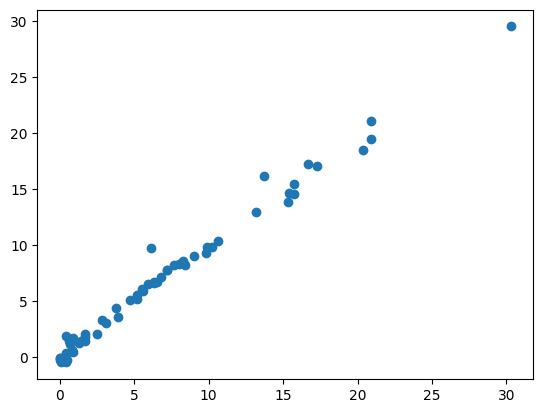

In [54]:
plt.scatter(y_test, y_pred)

Lasso Mean Squared Error: 2.2483458918974772
Lasso R^2 Score: 0.9492020263112388
Lasso Mean Absolute Error: 1.133175994914409


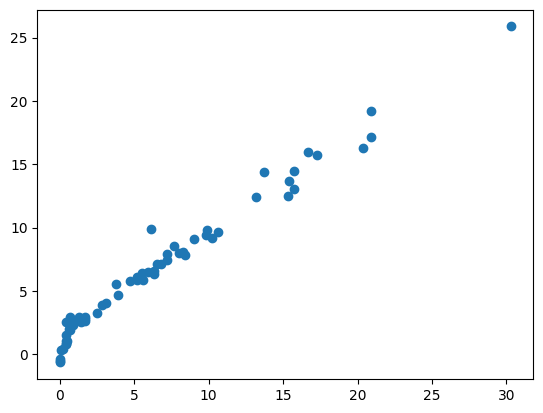

In [55]:
## Lasso Regression Model
from sklearn.linear_model import Lasso
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)
# Evaluate the Lasso model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
print(f'Lasso Mean Squared Error: {mse_lasso}')
print(f'Lasso R^2 Score: {r2_lasso}')
print(f'Lasso Mean Absolute Error: {mae_lasso}')
plt.scatter(y_test, y_pred_lasso)


Ridge Mean Squared Error: 0.6949198918152091
Ridge R^2 Score: 0.9842993364555512
Ridge Mean Absolute Error: 0.564230534010571


{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

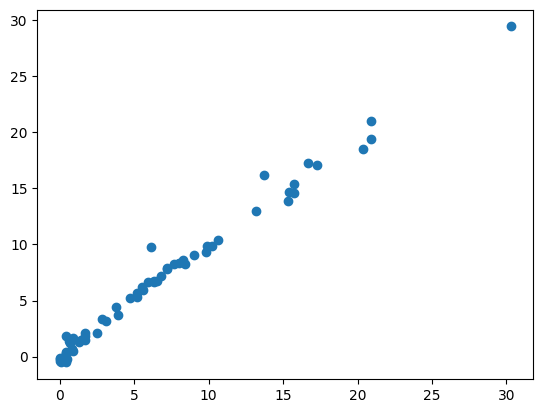

In [69]:
# Ridge Regression Model
from sklearn.linear_model import Ridge
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)
# Evaluate the Ridge model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
print(f'Ridge Mean Squared Error: {mse_ridge}')
print(f'Ridge R^2 Score: {r2_ridge}')
print(f'Ridge Mean Absolute Error: {mae_ridge}')
plt.scatter(y_test, y_pred_ridge)
ridge_reg.get_params()

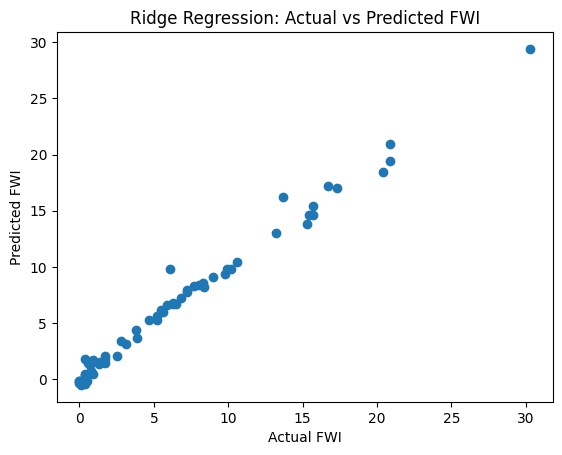

Mean Squared Error: 0.6949198918152091
R^2 Score: 0.9842993364555512
Mean Absolute Error: 0.564230534010571


{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

In [70]:
from sklearn.linear_model import RidgeCV
ridge_cv_model = RidgeCV(cv=5)
ridge_cv_model.fit(X_train, y_train)
y_pred_ridge_cv = ridge_cv_model.predict(X_test)
plt.scatter(y_test, y_pred_ridge_cv)
plt.xlabel('Actual FWI')
plt.ylabel('Predicted FWI')
plt.title('Ridge Regression: Actual vs Predicted FWI')
plt.show()
# Evaluate the model
mse = mean_squared_error(y_test, y_pred_ridge_cv)
r2 = r2_score(y_test, y_pred_ridge_cv)
mae = mean_absolute_error(y_test, y_pred_ridge_cv)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
print(f'Mean Absolute Error: {mae}')
ridge_cv_model.get_params()

ElasticNet Mean Squared Error: 5.517251101025224
ElasticNet R^2 Score: 0.8753460589519703


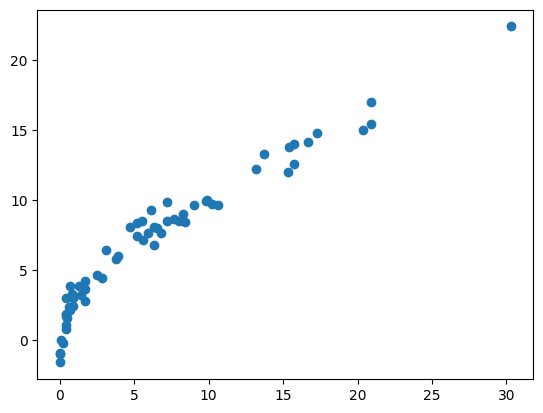

In [58]:
# ElasticNet Regression Model
from sklearn.linear_model import ElasticNet
elastic_net_reg = ElasticNet()
elastic_net_reg.fit(X_train, y_train)
y_pred_elastic = elastic_net_reg.predict(X_test)
# Evaluate the ElasticNet model
mse_elastic = mean_squared_error(y_test, y_pred_elastic)
r2_elastic = r2_score(y_test, y_pred_elastic)
print(f'ElasticNet Mean Squared Error: {mse_elastic}')
print(f'ElasticNet R^2 Score: {r2_elastic}')
plt.scatter(y_test, y_pred_elastic)


In [59]:
from sklearn.linear_model import LassoCV
LassoCV_model = LassoCV(cv=6)
LassoCV_model.fit(X_train, y_train)
y_pred_lasso_cv = LassoCV_model.predict(X_test)

In [60]:
y_pred_lasso_cv

array([ 8.19555311,  7.70455689, -0.29888032,  4.5282181 ,  6.72954405,
        1.60508218,  2.13761649,  7.66162358,  1.86784931,  3.30847288,
        0.50523996,  9.83190953,  9.32557595, 17.02176856, 18.41154124,
        1.42828059,  1.66521276, -0.3214228 ,  7.26966553,  3.06340237,
        1.73918517,  0.21424021,  6.49542793,  0.20775788, 21.06162852,
        5.09849825,  5.88447159,  9.79678352, -0.36785644,  9.87780812,
        6.71184085, -0.39278425, 10.3542873 , 14.52241971,  1.5573391 ,
        0.6179469 ,  2.03553215,  5.98138401, -0.5314512 , -0.4462941 ,
        6.55824357,  1.90553705,  8.50171056, -0.54489611, 15.42185534,
        8.34101446,  8.41663106,  1.42955402, 13.01640206,  1.1805452 ,
       29.26522317,  5.49106914, 17.20659346, 19.40616071, 13.7883148 ,
       16.14089345,  0.81821419,  9.04796366,  3.75025722, 14.48478042,
        5.18855625])

In [61]:
LassoCV_model.alpha_

np.float64(0.026574912410780367)

In [62]:
LassoCV_model.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [63]:
LassoCV_model.mse_path_

array([[52.40172359, 77.79919658, 40.78996202, 87.6913129 , 51.17143793,
        38.46373304],
       [46.50180849, 76.81768562, 35.60089633, 87.6913129 , 46.46698245,
        33.9073384 ],
       [40.90575515, 68.64864255, 30.78459883, 80.90348764, 42.33625573,
        29.55640903],
       [35.865109  , 60.72740761, 26.64106213, 72.16108355, 38.7071596 ,
        25.5451923 ],
       [31.47045595, 53.66642991, 23.10773732, 63.7726869 , 35.51680947,
        22.07770134],
       [27.6382651 , 47.4867413 , 20.1003045 , 56.43006153, 32.71034616,
        19.08160565],
       [24.2961827 , 42.07602973, 17.54566152, 50.00006787, 28.491     ,
        16.49403914],
       [21.38086657, 37.33637861, 15.38104924, 44.36655949, 24.72325504,
        14.26082467],
       [18.83730573, 33.18299919, 13.55165   , 39.42898782, 21.46383115,
        12.33450903],
       [16.61745675, 29.54145467, 12.01021165, 35.09905103, 18.64682746,
        10.67403856],
       [14.67997371, 26.34704238, 10.71587874, 31.

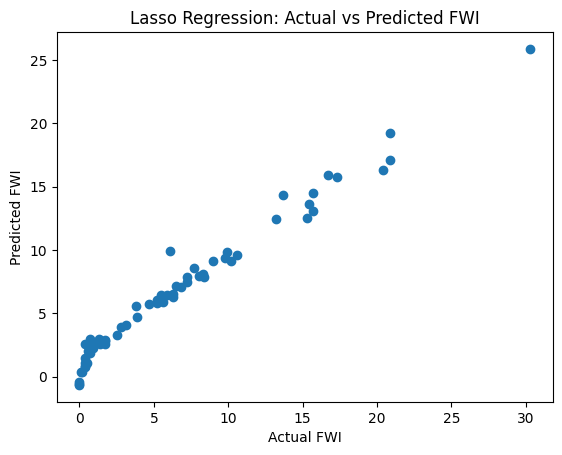

In [64]:
y_pred = lasso_reg.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual FWI')
plt.ylabel('Predicted FWI')
plt.title('Lasso Regression: Actual vs Predicted FWI')
plt.show()


In [65]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 2.2483458918974772
R^2 Score: 0.9492020263112388
Mean Absolute Error: 1.133175994914409


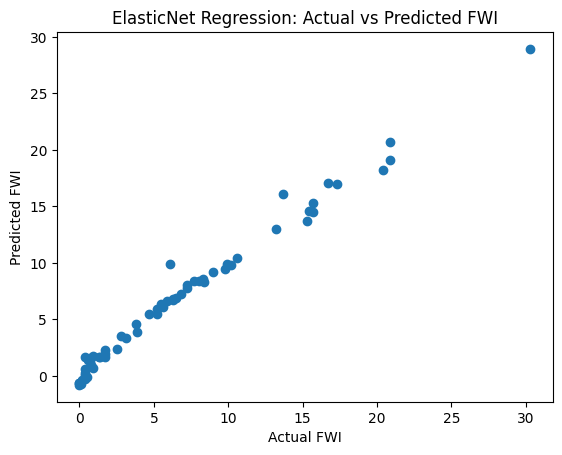

Mean Squared Error: 0.8222830416276261
R^2 Score: 0.9814217587854941
Mean Absolute Error: 0.65759467314309


In [66]:
from sklearn.linear_model import ElasticNetCV
elastic_net_cv_model = ElasticNetCV(cv=5)
elastic_net_cv_model.fit(X_train, y_train)
y_pred_elastic_cv = elastic_net_cv_model.predict(X_test)
plt.scatter(y_test, y_pred_elastic_cv)
plt.xlabel('Actual FWI')
plt.ylabel('Predicted FWI')
plt.title('ElasticNet Regression: Actual vs Predicted FWI')
plt.show()
# Evaluate the model
mse = mean_squared_error(y_test, y_pred_elastic_cv)
r2 = r2_score(y_test, y_pred_elastic_cv)
mae = mean_absolute_error(y_test, y_pred_elastic_cv)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
print(f'Mean Absolute Error: {mae}')


In [67]:
elastic_net_cv_model.alphas_

array([14.11706004, 13.16561744, 12.27829889, 11.45078264, 10.67903821,
        9.95930678,  9.28808283,  8.66209714,  8.07830078,  7.53385034,
        7.02609405,  6.55255882,  6.11093829,  5.6990815 ,  5.31498248,
        4.95677045,  4.62270071,  4.31114616,  4.02058933,  3.74961507,
        3.49690356,  3.26122397,  3.04142839,  2.83644629,  2.64527931,
        2.46699633,  2.30072904,  2.1456676 ,  2.00105679,  1.86619226,
        1.74041714,  1.62311885,  1.51372607,  1.411706  ,  1.31656174,
        1.22782989,  1.14507826,  1.06790382,  0.99593068,  0.92880828,
        0.86620971,  0.80783008,  0.75338503,  0.7026094 ,  0.65525588,
        0.61109383,  0.56990815,  0.53149825,  0.49567705,  0.46227007,
        0.43111462,  0.40205893,  0.37496151,  0.34969036,  0.3261224 ,
        0.30414284,  0.28364463,  0.26452793,  0.24669963,  0.2300729 ,
        0.21456676,  0.20010568,  0.18661923,  0.17404171,  0.16231189,
        0.15137261,  0.1411706 ,  0.13165617,  0.12278299,  0.11

In [68]:
elastic_net_cv_model.l1_ratio_

np.float64(0.5)

In [71]:
import pickle

# Save the model
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(ridge_cv_model, open('ridge_cv_model.pkl', 'wb'))
